# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | sechura
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | pedregal
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | kirakira
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | keflavik
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | udachny
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | al ghayzah
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | aasiaat
Processing Record 19 of Set 1 | fort bragg
Processing Record 20 of Set 1 | tynda
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | invercargill
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          539
Lat           539
Lng           539
Max Temp      539
Humidity      539
Cloudiness    539
Wind Speed    539
Country       539
Date          539
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,24.75,94,17,0.89,EC,1737603328
1,sechura,-5.5569,-80.8222,21.30,82,43,4.80,PE,1737603330
2,blackmans bay,-43.0167,147.3167,15.96,60,100,0.45,AU,1737603331
3,west island,-12.1568,96.8225,28.99,65,100,3.60,CC,1737603332
4,pedregal,8.3667,-82.4333,23.05,94,20,0.51,PA,1737603333


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,24.75,94,17,0.89,EC,1737603328
1,sechura,-5.5569,-80.8222,21.30,82,43,4.80,PE,1737603330
2,blackmans bay,-43.0167,147.3167,15.96,60,100,0.45,AU,1737603331
3,west island,-12.1568,96.8225,28.99,65,100,3.60,CC,1737603332
4,pedregal,8.3667,-82.4333,23.05,94,20,0.51,PA,1737603333


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

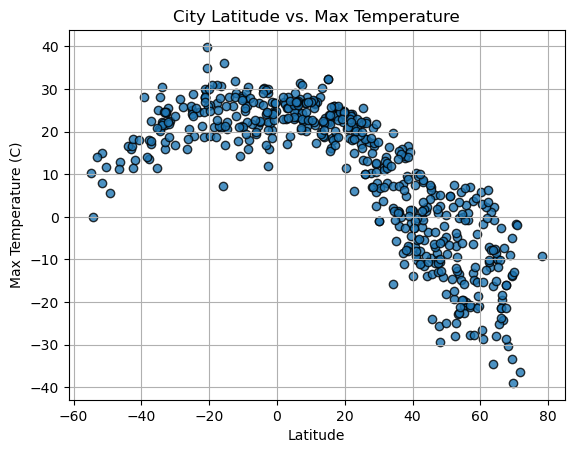

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

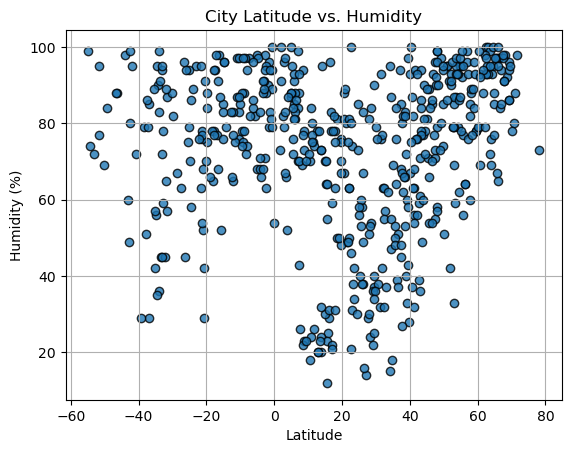

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.8)

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

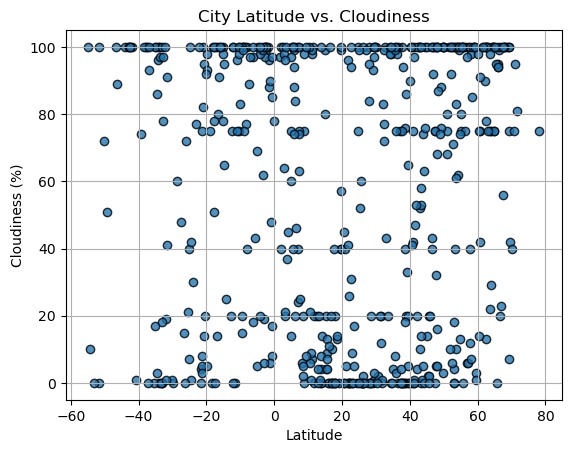

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

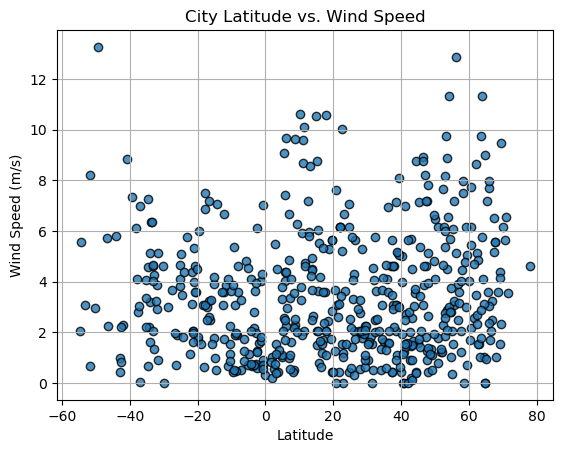

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coords):
    # Perform linear regression
    (slope, intercept, rvalue, _, _) = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Plot scatter plot and regression line
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.8)
    plt.plot(x_values, regression_line, "r-")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\nR² = {rvalue**2:.2f}",
                 text_coords, fontsize=12, color="red")
    plt.grid(True)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,pedregal,8.3667,-82.4333,23.05,94,20,0.51,PA,1737603333
5,ribeira grande,38.5167,-28.7000,16.54,83,76,7.15,PT,1737603334
10,keflavik,64.0049,-22.5624,2.24,69,75,11.32,IS,1737603340
11,iqaluit,63.7506,-68.5145,-16.15,72,75,9.77,CA,1737603341
12,udachny,66.4167,112.4000,-19.42,97,99,1.69,RU,1737603342


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,24.75,94,17,0.89,EC,1737603328
1,sechura,-5.5569,-80.8222,21.30,82,43,4.80,PE,1737603330
2,blackmans bay,-43.0167,147.3167,15.96,60,100,0.45,AU,1737603331
3,west island,-12.1568,96.8225,28.99,65,100,3.60,CC,1737603332
6,coquimbo,-29.9533,-71.3436,16.85,82,0,0.00,CL,1737603183


###  Temperature vs. Latitude Linear Regression Plot

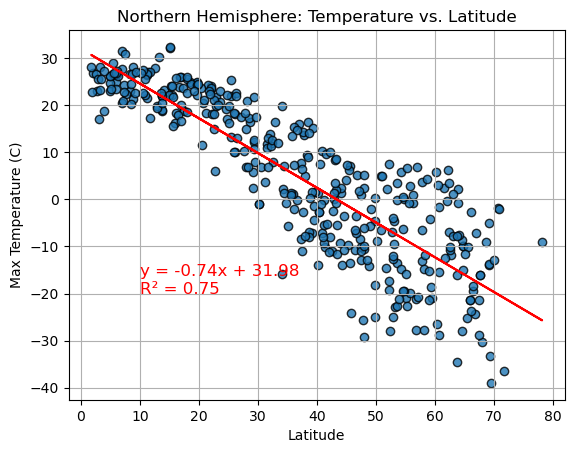

In [16]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], 
                       northern_hemi_df["Max Temp"], 
                       "Northern Hemisphere: Temperature vs. Latitude",
                       "Latitude", 
                       "Max Temperature (C)", 
                       (10, -20))

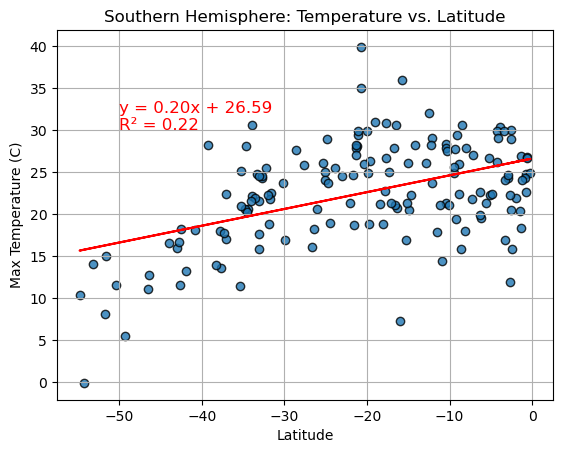

In [17]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], 
                       southern_hemi_df["Max Temp"], 
                       "Southern Hemisphere: Temperature vs. Latitude",
                       "Latitude", 
                       "Max Temperature (C)", 
                       (-50, 30))

**Discussion about the linear relationship:** 
For the Northern Hemisphere, there is a clear negative correlation between latitude and temperature. As latitude increases (moving further from the equator toward the poles), the temperature generally decreases.

For the Southern Hemisphere, there is a positive correlation between latitude and temperature. As latitude increases (closer to the equator), the temperature rises.

### Humidity vs. Latitude Linear Regression Plot

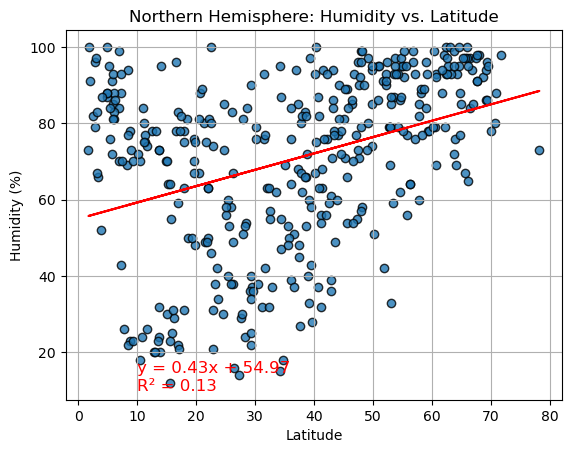

In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], 
                       northern_hemi_df["Humidity"], 
                       "Northern Hemisphere: Humidity vs. Latitude",
                       "Latitude", 
                       "Humidity (%)", 
                       (10, 10))

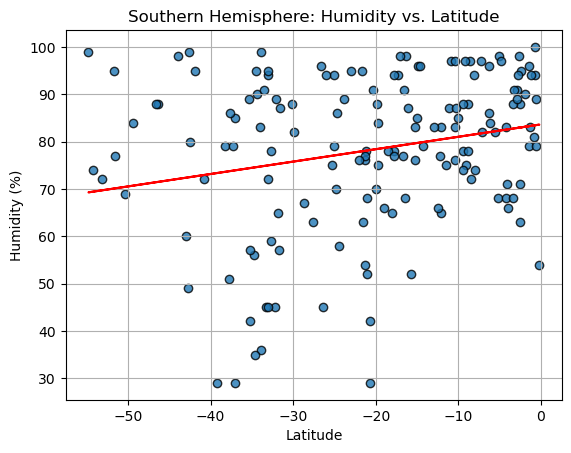

In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], 
                       southern_hemi_df["Humidity"], 
                       "Southern Hemisphere: Humidity vs. Latitude",
                       "Latitude", 
                       "Humidity (%)", 
                       (-50, 10))

**Discussion about the linear relationship:**
Northern Hemisphere: There is a weak or no significant correlation between latitude and humidity. Humidity values are distributed across all latitudes.
Southern Hemisphere: Similarly, no strong linear relationship exists between latitude and humidity.


### Cloudiness vs. Latitude Linear Regression Plot

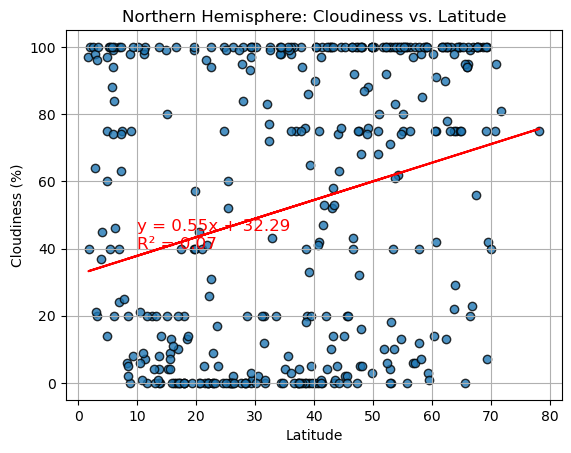

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], 
                       northern_hemi_df["Cloudiness"], 
                       "Northern Hemisphere: Cloudiness vs. Latitude",
                       "Latitude", 
                       "Cloudiness (%)", 
                       (10, 40))

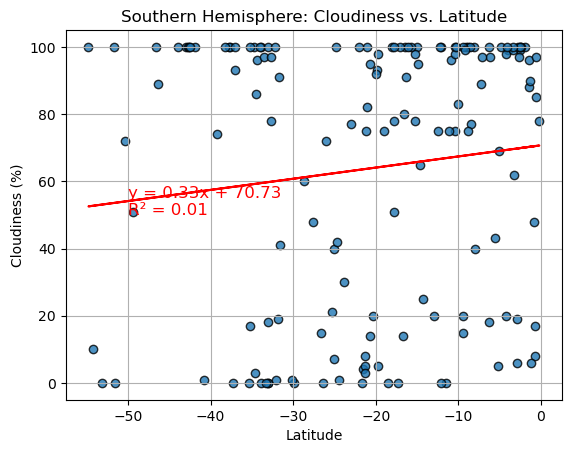

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], 
                       southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere: Cloudiness vs. Latitude",
                       "Latitude", 
                       "Cloudiness (%)", 
                       (-50, 50))

**Discussion about the linear relationship:** 
Northern Hemisphere: The data shows no clear pattern or correlation between latitude and cloudiness. Cloudiness appears random across the range.
Southern Hemisphere: The same trend is observed as in the Northern Hemisphere, with no discernible relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

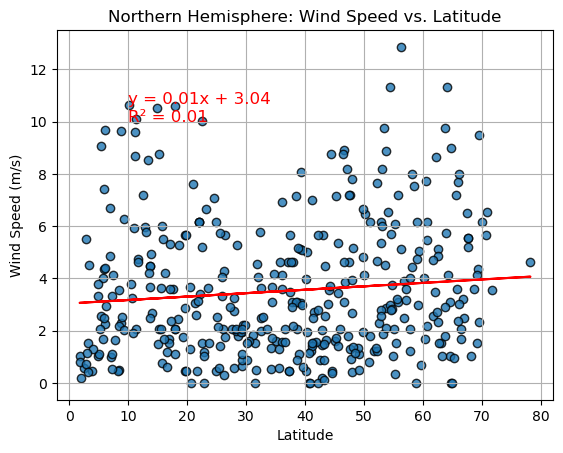

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], 
                       northern_hemi_df["Wind Speed"], 
                       "Northern Hemisphere: Wind Speed vs. Latitude",
                       "Latitude", 
                       "Wind Speed (m/s)", 
                       (10, 10))

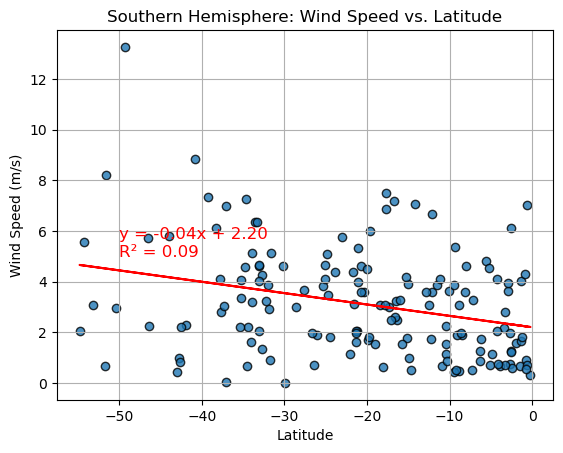

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], 
                       southern_hemi_df["Wind Speed"], 
                       "Southern Hemisphere: Wind Speed vs. Latitude",
                       "Latitude", 
                       "Wind Speed (m/s)", 
                       (-50, 5))

**Discussion about the linear relationship:** 
Northern Hemisphere: There is a weak correlation between latitude and wind speed, indicating slightly stronger winds at higher latitudes.
Southern Hemisphere: The relationship is similarly weak, showing minimal changes in wind speed relative to latitude.